**Patricia Leondrea Diajeng Putri**

**122450050 / RB**

# **Analisis Produksi Padi di Pulau Sumatera**

### **Tujuan**
Visualisasi ini digunakan untuk memberikan gambaran pola produksi padi pada setiap provinsi di Sumatera berdasarkan data historis. Visualisasi ini dapat mengidentifikasi distribusi produksi padi, memperlihatkan provinsi mana yang memiliki produksi yang tertinggi ataupun yang terendah, serta melihat tren produksi secara keseluruhan dari beberapa tahun tertentu. Tujuannya adalah untuk membantu pemerintah dan pemangku kepentingan sektor pertanian memantau kinerja produksi pada terkini dan menyoroti wilayah-wilayah yang memerlukan intervensi atau perhatian lebih lanjut untuk meningkatkan hasil produksi.

### **User**
Visualisasi ini menggunakan user "a boardroom environment" karena mencakup pemangku kepentingan sektor pertanian yang sama-sama memiliki pemahaman tentang produksi padi. Dengan visualisasi ini, maka akan dimanfaatkan untuk menganalisis data serta mengidentifiskasi area yang memerlukan perhatian.

### **Fungsi**
Visualisasi data produksi padi di Pulau Sumatera, untuk menyampaikan narasi yang jelas mengenai tren dan distribusi hasil pertanian di berbagai provinsi, serta menyoroti daerah yang memerlukan perhatian.

### **Tone Visualiasi**
Visualisasi ini dirancang untuk menyajikan data produksi padi di Pulau Sumatera dengan cara yang analitis dan pragmatis, memungkinkan para pemangku kepentingan untuk memahami dengan cepat dan jelas perbandingan antara provinsi, serta mengidentifikasi area yang memerlukan perhatian untuk meningkatkan hasil pertanian.

In [3]:
# Mengimport pustaka yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca file
data = pd.read_csv("Data_Tanaman_Padi_Sumatera_version_1.csv")
data

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23


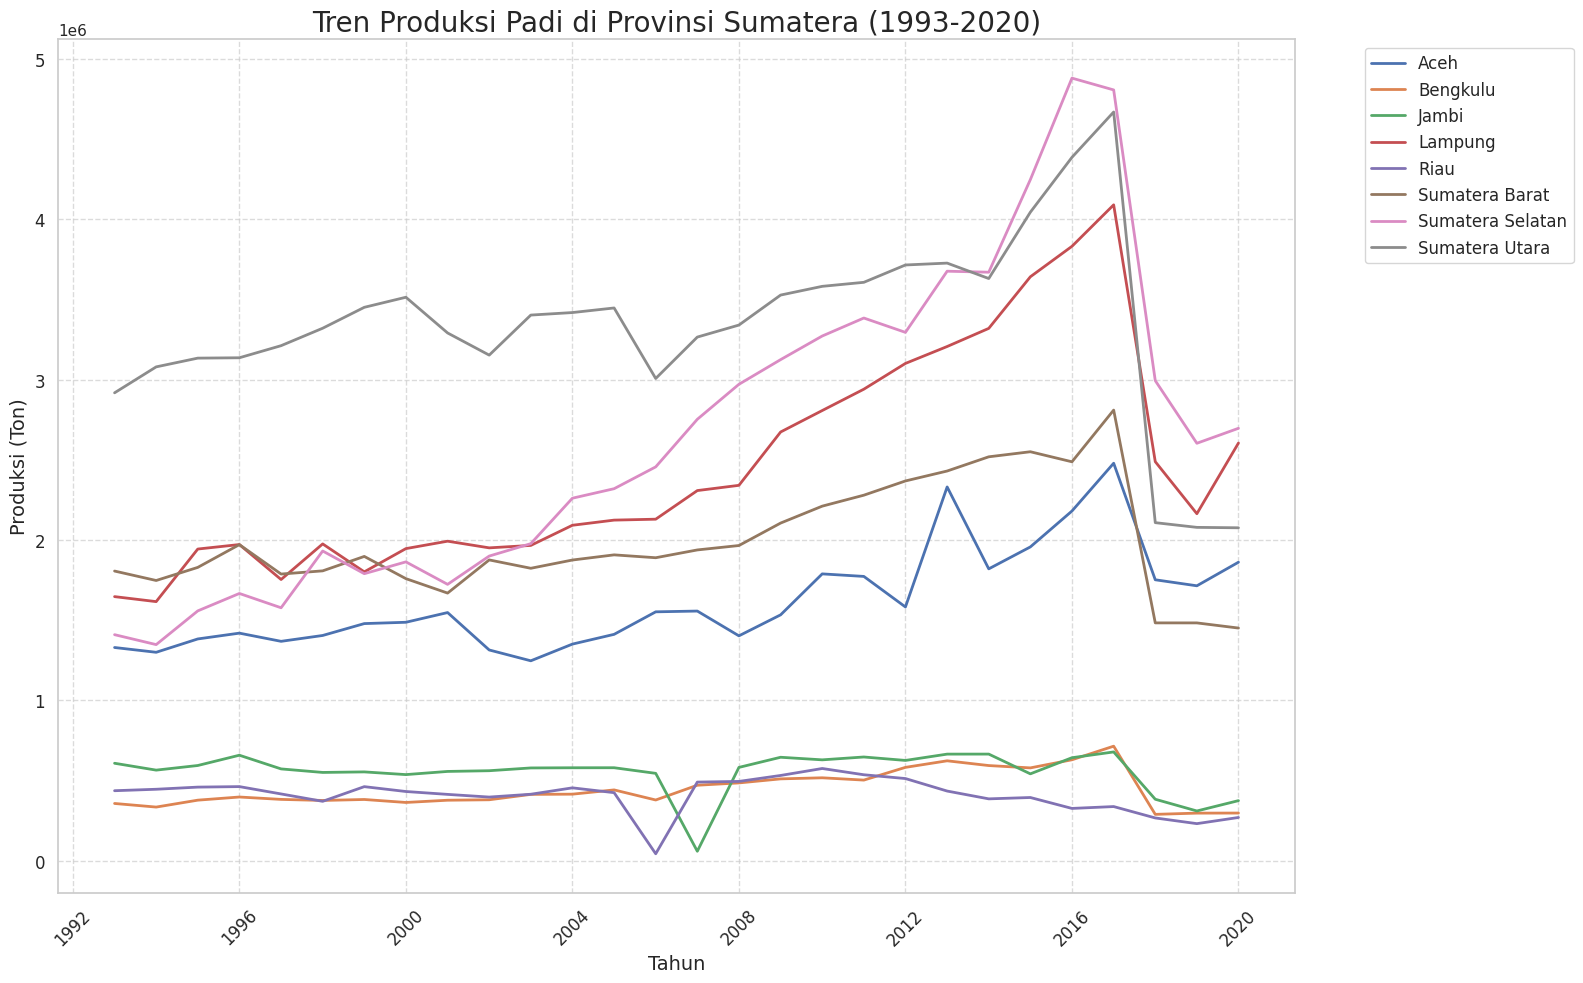

Statistik Ringkasan Produksi Padi per Provinsi:
                     Rata-rata     Minimum   Maksimum  Standar Deviasi
Provinsi                                                              
Sumatera Utara    3.330471e+06  2076280.01  4669777.5    582713.087351
Sumatera Selatan  2.648643e+06  1347611.00  4881089.0    994018.438439
Lampung           2.444068e+06  1615751.00  4090654.0    682384.127352
Sumatera Barat    1.990396e+06  1450839.74  2810425.0    346148.605652
Aceh              1.618737e+06  1246614.00  2478922.0    316108.303321
Jambi             5.528638e+05    58663.00   678127.0    130587.801967
Bengkulu          4.449648e+05   288810.52   714017.0    112475.645745
Riau              4.074645e+05    42938.00   574864.0    108297.705482

Tingkat Pertumbuhan Tahunan Rata-rata Produksi Padi per Provinsi:
           Provinsi  Laju Pertumbuhan
6  Sumatera Selatan          0.024323
3           Lampung          0.017128
0              Aceh          0.012545
1          Bengkulu    

<Figure size 640x480 with 0 Axes>

In [4]:
# Menyiapkan data dan plot
data['Tahun'] = pd.to_datetime(data['Tahun'], format='%Y')
data_bersih = data.groupby(['Provinsi', 'Tahun'])['Produksi'].sum().reset_index()

plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Membuat plot time series
for provinsi in data_bersih['Provinsi'].unique():
    data_provinsi = data_bersih[data_bersih['Provinsi'] == provinsi]
    plt.plot(data_provinsi['Tahun'], data_provinsi['Produksi'], label=provinsi, linewidth=2)

plt.title('Tren Produksi Padi di Provinsi Sumatera (1993-2020)', fontsize=20)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Produksi (Ton)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

plt.savefig('Tren_Produksi_Padi_Sumatera_Time_Series.png', dpi=300, bbox_inches='tight')

# Statistika Ringkasan
statistik_ringkasan = data_bersih.groupby('Provinsi')['Produksi'].agg(['mean', 'min', 'max', 'std']).sort_values('mean', ascending=False)
statistik_ringkasan = statistik_ringkasan.rename(columns={'mean': 'Rata-rata', 'min': 'Minimum', 'max': 'Maksimum', 'std': 'Standar Deviasi'})
print("Statistik Ringkasan Produksi Padi per Provinsi:")
print(statistik_ringkasan)

# Menghitung tingkat pertumbuhan
tingkat_pertumbuhan = []
for provinsi in data_bersih['Provinsi'].unique():
    data_provinsi = data_bersih[data_bersih['Provinsi'] == provinsi].sort_values('Tahun')
    produksi_tahun_pertama = data_provinsi.iloc[0]['Produksi']
    produksi_tahun_terakhir = data_provinsi.iloc[-1]['Produksi']
    jumlah_tahun = (data_provinsi.iloc[-1]['Tahun'] - data_provinsi.iloc[0]['Tahun']).days / 365.25
    laju_pertumbuhan = (produksi_tahun_terakhir / produksi_tahun_pertama) ** (1/jumlah_tahun) - 1
    tingkat_pertumbuhan.append({'Provinsi': provinsi, 'Laju Pertumbuhan': laju_pertumbuhan})

df_pertumbuhan = pd.DataFrame(tingkat_pertumbuhan).sort_values('Laju Pertumbuhan', ascending=False)
print("\nTingkat Pertumbuhan Tahunan Rata-rata Produksi Padi per Provinsi:")
print(df_pertumbuhan)

# Identifikasi provinsi dengan tingkat pertumbuhan tertinggi dan terendah
pertumbuhan_tertinggi = df_pertumbuhan.iloc[0]['Provinsi']
pertumbuhan_terendah = df_pertumbuhan.iloc[-1]['Provinsi']
print(f"\nProvinsi dengan tingkat pertumbuhan tertinggi: {pertumbuhan_tertinggi}")
print(f"Provinsi dengan tingkat pertumbuhan terendah: {pertumbuhan_terendah}")